In [14]:
import numpy as np

from tqdm import trange
from importlib import reload

import utils.misc_utils as mutils
import utils.online_queueing_network as queuenetol
import utils.max_weight_policy as mwp
import utils.static_policy as stat
import utils.horizon_experiment as experiment

In [15]:
reload(experiment)
reload(mutils)
reload(mwp)
reload(stat)
reload(queuenetol);

## Simulation Parameters

In [16]:
# simulation lengths
T_horizon = 50000 # time horizon
N_runs    = 100  # number of simulations

# noise and arrival rates
arrival_rate   = 0.8 # lambda
noise_variance = 0.1 # sigma^2

# algorithm parameters
beta  = 8*noise_variance # exploration tuner (beta > 4 sigma^2)
nu    = 0 # backlog-cost tradeoff tuner (T^{1/3}) (to be set later)
delta = T_horizon**(-2*noise_variance/(beta-2*noise_variance)) # exploration tuner

# topology
N_nodes          = 5
source_node      = 0
destination_node = 4
edges_list       = [[0,1], [0,2], [0,3], [1,4], [2,4], [3,4]]
node_edge_adjacency = mutils.prepare_adjacency(edges_list, N_nodes)

# edge properties
edge_capacities = np.array([1, 3, 1, 1, 1, 1])
true_edge_costs = np.array([1, 2, 10, 15, 11, 2])

simulation_params = mutils.SimulationParameters(node_edge_adjacency, 
                 true_edge_costs, edge_capacities, 
                 source_node, destination_node, 
                 noise_variance, 
                 arrival_rate, 
                 N_runs, T_horizon, 
                 beta, delta, nu)

## Variation in $\nu$

In [17]:
print('Theoretical nu = {:0.3f}'.format(T_horizon**(1/3)))
print('Theoretical delta = {:0.3f}'.format(T_horizon**(-2*noise_variance/(beta-2*noise_variance))))
print('Theoretical beta > {:0.3f}'.format(4*noise_variance))
simulation_params.delta = 0.027
simulation_params.beta = 0.5

Theoretical nu = 36.840
Theoretical delta = 0.027
Theoretical beta > 0.400


In [18]:
np.random.seed(13)

nu_list = np.array([50,100,200])
total_transmission_costs = np.zeros([nu_list.shape[0], T_horizon])
transmission_costs = np.zeros([nu_list.shape[0], T_horizon])
backlog_costs      = np.zeros([nu_list.shape[0], T_horizon])
backlogs           = np.zeros([nu_list.shape[0], T_horizon])
for ii in trange(nu_list.shape[0]):
    simulation_params.nu = nu_list[ii]

    transmisson_cost_till_tt, backlog_cost_at_tt, transmisson_cost_at_tt, backlog_at_tt = experiment.run_horizon_experiment(simulation_params)
    
    total_transmission_costs[ii,:] = transmisson_cost_till_tt
    transmission_costs[ii,:] = transmisson_cost_at_tt
    backlog_costs[ii,:] = backlog_cost_at_tt
    backlogs[ii,:] = backlog_at_tt
total_cost = total_transmission_costs + backlog_costs

  0%|          | 0/3 [00:00<?, ?it/s]

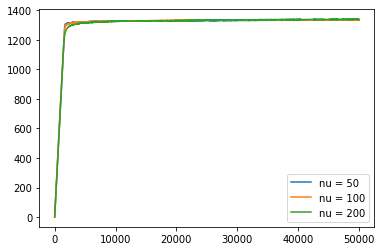

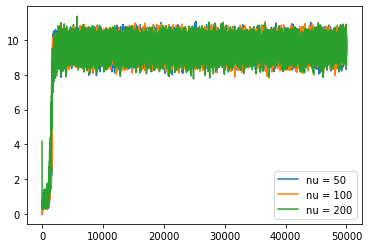

In [ ]:
# mutils.plot_results(nu_list, np.arange(T_horizon), total_cost, 'nu')
mutils.plot_results(nu_list, np.arange(T_horizon), backlogs, 'nu')
mutils.plot_results(nu_list, np.arange(T_horizon), transmission_costs, 'nu')